C:\Users\David Nguyen\AppData\Local\Temp\ipykernel_18904\2624243836.py:17: RuntimeWarning: Mean of empty slice
  downsampled_array = np.nanmean(array.reshape(-1, int( len(array) / samples ) ), axis=1)


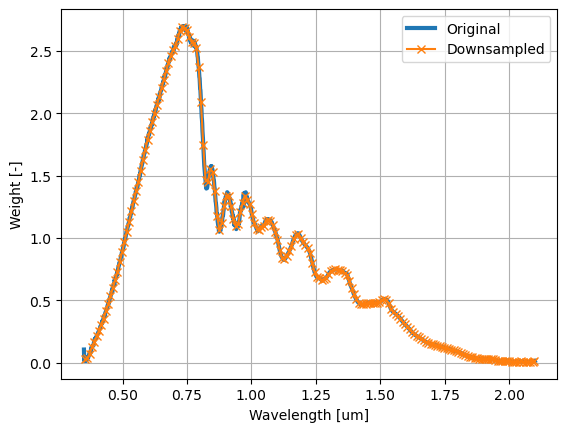

In [9]:
import matplotlib.pyplot as plt
import numpy as np


OS_ROW_LIMIT = 200


# Pads an <array> with a number <size> of NaNs
def pad_with_nan(array, size):
    return np.append(array, np.zeros(size) * np.NaN)

# Performs downsampling of an array according to the accepted answer to this post:
# https://stackoverflow.com/questions/20322079/downsample-a-1d-numpy-array
# this function takes a 1D <array> and downsamples it to a number of <samples>
# assuming the length of the <array> is divisible by the number of <samples>
def downsample_by_mean(array, samples):
    downsampled_array = np.nanmean(array.reshape(-1, int( len(array) / samples ) ), axis=1)
    return downsampled_array[~np.isnan(downsampled_array)]


if __name__ == "__main__":
    # File paths
    csv_filepath = r'C:\Users\David Nguyen\Desktop\OSL2.csv'
    spcd_filepath = r'C:\Users\David Nguyen\Desktop\OSL2.spcd'

    # Read spectral data from CSV file (manually created from THORLABS *.xlsx file)
    csv_data = np.genfromtxt(csv_filepath, delimiter=',')

    # Retrieve wavelengths in micrometers
    waves = csv_data[:, 0] / 1000.0

    # Retrieve weights
    weights = csv_data[:, 1]

    # Downsample data to 200 rows (limit in OpticStudio) using the accepted answer to this post:
    # https://stackoverflow.com/questions/20322079/downsample-a-1d-numpy-array

    # Number of samples to pad
    pad_num = 200 - len(weights) % 200

    # In case no padding is necessary
    if pad_num == 200:
        pad_num = 0

    # Pad wavelengths and weights with NaNs
    pad_waves = pad_with_nan(waves, pad_num)
    pad_weights = pad_with_nan(weights, pad_num)
    
    # Downsample to < 200 data points
    downsampled_waves = downsample_by_mean(pad_waves, OS_ROW_LIMIT)
    downsampled_weights = downsample_by_mean(pad_weights, OS_ROW_LIMIT)

    # Plot the original and downsamples data for sanity check
    plt.figure()
    plt.plot(waves, weights, label='Original', linewidth=3)
    plt.plot(downsampled_waves, downsampled_weights, marker='x', label='Downsampled')
    plt.xlabel('Wavelength [um]')
    plt.ylabel('Weight [-]')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Write downsapmled data to *.spcd file
    with open(spcd_filepath, 'w') as file:
        for ii in range(len(downsampled_waves)):
            file.write(str(downsampled_waves[ii]) + ' ' + str(downsampled_weights[ii]) + '\n')